In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import numpy as np

/Users/liqingyang/opt/anaconda3/lib/python3.9/site-packages/mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


In [6]:
## Get the ../btc_1h_2015_10_08.csv data

bitcoin_1h = pd.read_csv('/Users/liqingyang/Documents/GitHub/head_shoulder_bots/data/bitcoin/btc_1h_2015_10_08.csv', 
                         parse_dates=['date'],
                         index_col=['date'],
                         header=1
                        )
bitcoin_1h

,unix,symbol,open,high,low,close,Volume BTC,Volume USD
date,,,,,,,,
2023-03-11 23:00:00,1678575600000,BTC/USD,20655.30,21249.00,20655.30,21051.13,40.770876,8.582730e+05
2023-03-11 22:00:00,1678572000000,BTC/USD,21097.99,21459.99,20556.70,20655.30,84.363120,1.742546e+06
2023-03-11 21:00:00,1678568400000,BTC/USD,20982.19,21110.83,20880.14,21097.99,9.301693,1.962470e+05
2023-03-11 20:00:00,1678564800000,BTC/USD,20644.43,21173.29,20644.43,20982.19,45.597754,9.567407e+05
2023-03-11 19:00:00,1678561200000,BTC/USD,20962.31,20962.31,20644.43,20644.43,22.135508,4.569749e+05
...,...,...,...,...,...,...,...,...
2015-10-08 17:00:00,1444323600,BTC/USD,244.25,244.99,244.02,244.99,3.920632,9.605156e+02
2015-10-08 16:00:00,1444320000,BTC/USD,244.92,244.92,244.25,244.25,3.895252,9.514154e+02
2015-10-08 15:00:00,1444316400,BTC/USD,245.00,245.00,244.92,244.92,3.016926,7.389055e+02


In [7]:
bitcoin_df = bitcoin_1h.copy()
included = bitcoin_df.columns.to_list()
included.remove('unix')
bitcoin_df = bitcoin_df[included]
bitcoin_df = bitcoin_df.sort_index()
bitcoin_df

,symbol,open,high,low,close,Volume BTC,Volume USD
date,,,,,,,
2015-10-08 13:00:00,BTC/USD,0.00,245.00,0.00,245.00,0.606654,1.486303e+02
2015-10-08 14:00:00,BTC/USD,245.00,245.00,244.50,245.00,4.453649,1.091144e+03
2015-10-08 15:00:00,BTC/USD,245.00,245.00,244.92,244.92,3.016926,7.389055e+02
2015-10-08 16:00:00,BTC/USD,244.92,244.92,244.25,244.25,3.895252,9.514154e+02
2015-10-08 17:00:00,BTC/USD,244.25,244.99,244.02,244.99,3.920632,9.605156e+02
...,...,...,...,...,...,...,...
2023-03-11 19:00:00,BTC/USD,20962.31,20962.31,20644.43,20644.43,22.135508,4.569749e+05
2023-03-11 20:00:00,BTC/USD,20644.43,21173.29,20644.43,20982.19,45.597754,9.567407e+05
2023-03-11 21:00:00,BTC/USD,20982.19,21110.83,20880.14,21097.99,9.301693,1.962470e+05


In [9]:
def detect_head_and_shoulders(data, window=5, tolerance=0.05):
    patterns = []

    for i in range(window, len(data) - (2 * window)):
        left_peak = data.iloc[i - window:i]['high'].max()
        middle_peak = data.iloc[i:i + window]['high'].max()
        right_peak = data.iloc[i + window:i + (2 * window)]['high'].max()

        max_value = max(left_peak, middle_peak, right_peak)
        min_value = min(left_peak, middle_peak, right_peak)

        # Check if the middle peak is the highest and if the other peaks are within the tolerance range
        if (
            middle_peak == max_value
            and abs(left_peak - right_peak) / min_value <= tolerance
        ):
            patterns.append(data.index[i + window // 2])

    return patterns
patterns = detect_head_and_shoulders(bitcoin_df)
print("Head and Shoulders pattern detected at indices:", patterns)

Head and Shoulders pattern detected at indices: [Timestamp('2015-10-09 11:00:00'), Timestamp('2015-10-09 18:00:00'), Timestamp('2015-10-09 19:00:00'), Timestamp('2015-10-09 20:00:00'), Timestamp('2015-10-09 21:00:00'), Timestamp('2015-10-09 22:00:00'), Timestamp('2015-10-09 23:00:00'), Timestamp('2015-10-10 12:00:00'), Timestamp('2015-10-10 13:00:00'), Timestamp('2015-10-10 21:00:00'), Timestamp('2015-10-10 22:00:00'), Timestamp('2015-10-10 23:00:00'), Timestamp('2015-10-11 00:00:00'), Timestamp('2015-10-11 01:00:00'), Timestamp('2015-10-11 02:00:00'), Timestamp('2015-10-11 03:00:00'), Timestamp('2015-10-11 04:00:00'), Timestamp('2015-10-11 05:00:00'), Timestamp('2015-10-11 06:00:00'), Timestamp('2015-10-11 07:00:00'), Timestamp('2015-10-11 08:00:00'), Timestamp('2015-10-11 15:00:00'), Timestamp('2015-10-11 21:00:00'), Timestamp('2015-10-11 22:00:00'), Timestamp('2015-10-11 23:00:00'), Timestamp('2015-10-12 00:00:00'), Timestamp('2015-10-12 01:00:00'), Timestamp('2015-10-12 02:00:00'),

In [ ]:
## Get the ../btc_1h_2015_10_08.csv data

bitcoin_1h = pd.read_csv('/Users/liqingyang/Documents/GitHub/head_shoulder_bots/data/bitcoin/btc_1h_2015_10_08.csv', 
                         parse_dates=['date'],
                         index_col=['date'],
                         header=1
                        )
bitcoin_df = bitcoin_1h.copy()
included = bitcoin_df.columns.to_list()
included.remove('unix')
bitcoin_df = bitcoin_df[included]
bitcoin_df = bitcoin_df.sort_index()

def detect_head_and_shoulders(data, window=5, tolerance=0.05):
    patterns = []

    for i in range(window, len(data) - (2 * window)):
        left_peak = data.iloc[i - window:i]['high'].max()
        middle_peak = data.iloc[i:i + window]['high'].max()
        right_peak = data.iloc[i + window:i + (2 * window)]['high'].max()

        max_value = max(left_peak, middle_peak, right_peak)
        min_value = min(left_peak, middle_peak, right_peak)

        # Check if the middle peak is the highest and if the other peaks are within the tolerance range
        if (
            middle_peak == max_value
            and abs(left_peak - right_peak) / min_value <= tolerance
        ):
            patterns.append(data.index[i + window // 2])

    return patterns
patterns = detect_head_and_shoulders(bitcoin_df)
print("Head and Shoulders pattern detected at indices:", patterns)

def visualize_patterns(data, patterns, window=5):
    plt.figure(figsize=(12, 6))
    plt.plot(data['high'], label='Stock High Price')

    for pattern_index in patterns:
        start = pattern_index - pd.DateOffset(window)
        end = pattern_index + pd.DateOffset(2 * window)
        pattern_data = data.loc[start:end]
        plt.plot(pattern_data.index, pattern_data['high'], 'ro', label='Head and Shoulders')

    plt.xlabel('Date')
    plt.ylabel('Stock High Price')
    plt.title('Head and Shoulders Patterns')
    plt.legend()
    plt.show()

visualize_patterns(bitcoin_df, patterns)



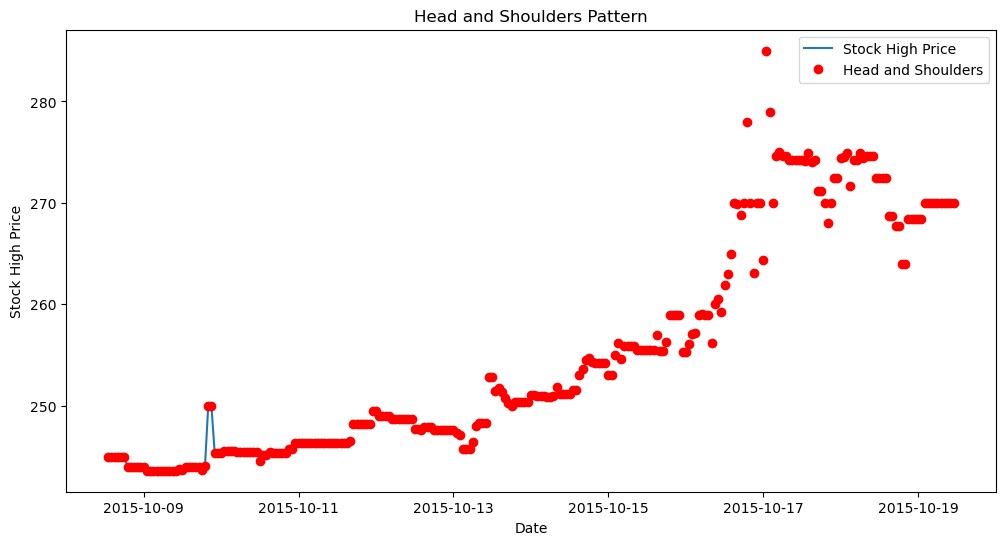

In [17]:
def visualize_patterns(data, patterns, window=5):
    plt.figure(figsize=(12, 6))
    plt.plot(data['high'], label='Stock High Price')

    for pattern_index in patterns:
        start = pattern_index - pd.DateOffset(window)
        end = pattern_index + pd.DateOffset(2 * window)
        pattern_data = data.loc[start:end]
        plt.plot(pattern_data.index, pattern_data['high'], 'ro', label='Head and Shoulders')

    plt.xlabel('Date')
    plt.ylabel('Stock High Price')
    plt.title('Head and Shoulders Patterns')
    plt.legend()
    plt.show()

def visualize_one_pattern(data, patterns, window=5, plot_window=50):
    if not patterns:
        print("No patterns detected.")
        return

    first_pattern = patterns[0]
    plt.figure(figsize=(12, 6))

    start = first_pattern - pd.DateOffset(plot_window)
    end = first_pattern + pd.DateOffset(plot_window)
    plot_data = data.loc[start:end]
    plt.plot(plot_data['high'], label='Stock High Price')

    pattern_start = first_pattern - pd.DateOffset(window)
    pattern_end = first_pattern + pd.DateOffset(2 * window)
    pattern_data = data.loc[pattern_start:pattern_end]
    plt.plot(pattern_data.index, pattern_data['high'], 'ro', label='Head and Shoulders')

    plt.xlabel('Date')
    plt.ylabel('Stock High Price')
    plt.title('Head and Shoulders Pattern')
    plt.legend()
    plt.show()
    

visualize_one_pattern(bitcoin_df, patterns,plot_window=1)


In [18]:
def detect_head_and_shoulders_v2(data, window=5, tolerance=0.05):
    patterns = []

    for i in range(window, len(data) - (2 * window)):
        left_peak = data.iloc[i - window:i]['high'].max()
        middle_peak = data.iloc[i:i + window]['high'].max()
        right_peak = data.iloc[i + window:i + (2 * window)]['high'].max()

        max_value = max(left_peak, middle_peak, right_peak)
        min_value = min(left_peak, middle_peak, right_peak)

        if (
            middle_peak == max_value
            and abs(left_peak - right_peak) / min_value <= tolerance
        ):
            pattern_start = data.index[i - window]
            pattern_end = data.index[i + (2 * window)]
            patterns.append((pattern_start, pattern_end))

    return patterns
pattern_ranges = detect_head_and_shoulders_v2(bitcoin_df)
print("Head and Shoulders pattern date ranges:", pattern_ranges)


Head and Shoulders pattern date ranges: [(Timestamp('2015-10-09 04:00:00'), Timestamp('2015-10-09 19:00:00')), (Timestamp('2015-10-09 11:00:00'), Timestamp('2015-10-10 02:00:00')), (Timestamp('2015-10-09 12:00:00'), Timestamp('2015-10-10 03:00:00')), (Timestamp('2015-10-09 13:00:00'), Timestamp('2015-10-10 04:00:00')), (Timestamp('2015-10-09 14:00:00'), Timestamp('2015-10-10 05:00:00')), (Timestamp('2015-10-09 15:00:00'), Timestamp('2015-10-10 06:00:00')), (Timestamp('2015-10-09 16:00:00'), Timestamp('2015-10-10 07:00:00')), (Timestamp('2015-10-10 05:00:00'), Timestamp('2015-10-10 20:00:00')), (Timestamp('2015-10-10 06:00:00'), Timestamp('2015-10-10 21:00:00')), (Timestamp('2015-10-10 14:00:00'), Timestamp('2015-10-11 05:00:00')), (Timestamp('2015-10-10 15:00:00'), Timestamp('2015-10-11 06:00:00')), (Timestamp('2015-10-10 16:00:00'), Timestamp('2015-10-11 07:00:00')), (Timestamp('2015-10-10 17:00:00'), Timestamp('2015-10-11 08:00:00')), (Timestamp('2015-10-10 18:00:00'), Timestamp('201

Head and Shoulders pattern date ranges: [(Timestamp('2015-10-08 13:00:00'), Timestamp('2015-10-11 01:00:00')), (Timestamp('2015-10-08 14:00:00'), Timestamp('2015-10-11 02:00:00')), (Timestamp('2015-10-08 15:00:00'), Timestamp('2015-10-11 03:00:00')), (Timestamp('2015-10-08 16:00:00'), Timestamp('2015-10-11 04:00:00')), (Timestamp('2015-10-08 17:00:00'), Timestamp('2015-10-11 05:00:00')), (Timestamp('2015-10-08 18:00:00'), Timestamp('2015-10-11 06:00:00')), (Timestamp('2015-10-08 19:00:00'), Timestamp('2015-10-11 07:00:00')), (Timestamp('2015-10-08 20:00:00'), Timestamp('2015-10-11 08:00:00')), (Timestamp('2015-10-08 21:00:00'), Timestamp('2015-10-11 09:00:00')), (Timestamp('2015-10-08 22:00:00'), Timestamp('2015-10-11 10:00:00')), (Timestamp('2015-10-08 23:00:00'), Timestamp('2015-10-11 11:00:00')), (Timestamp('2015-10-09 00:00:00'), Timestamp('2015-10-11 12:00:00')), (Timestamp('2015-10-09 01:00:00'), Timestamp('2015-10-11 13:00:00')), (Timestamp('2015-10-10 08:00:00'), Timestamp('201

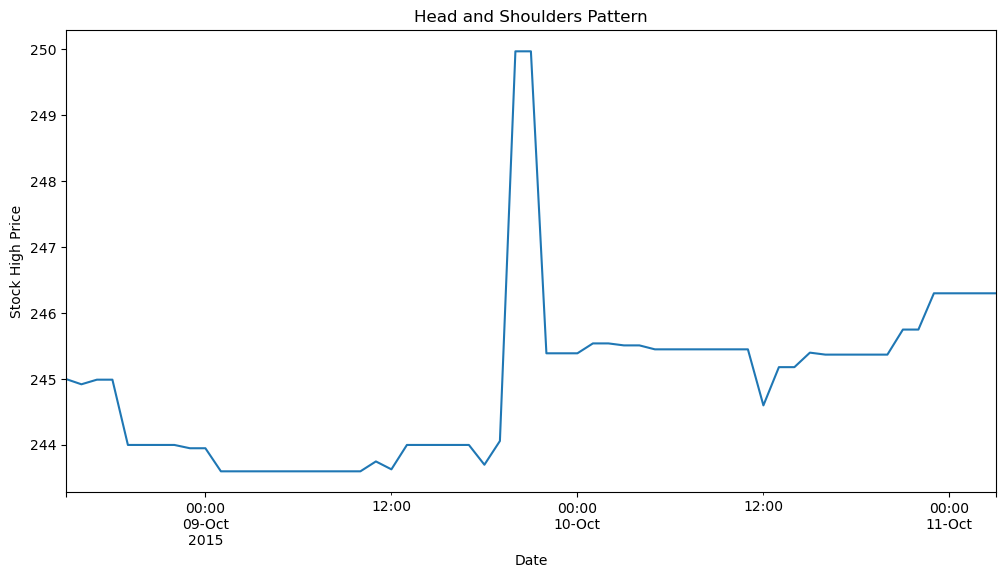

In [31]:
def detect_head_and_shoulders_v2(data, window=20, tolerance=0.5):
    patterns = []

    for i in range(window, len(data) - (2 * window)):
        left_peak = data.iloc[i - window:i]['high'].max()
        middle_peak = data.iloc[i:i + window]['high'].max()
        right_peak = data.iloc[i + window:i + (2 * window)]['high'].max()

        max_value = max(left_peak, middle_peak, right_peak)
        min_value = min(left_peak, middle_peak, right_peak)

        if (
            middle_peak == max_value
            and abs(left_peak - right_peak) / min_value <= tolerance
        ):
            pattern_start = data.index[i - window]
            pattern_end = data.index[i + (2 * window)]
            patterns.append((pattern_start, pattern_end))

    return patterns
pattern_ranges = detect_head_and_shoulders_v2(bitcoin_df)
print("Head and Shoulders pattern date ranges:", pattern_ranges)


if pattern_ranges:
    first_pattern = pattern_ranges[2]
    pattern_data = bitcoin_df.loc[first_pattern[0]:first_pattern[1]]
    pattern_data['high'].plot(figsize=(12, 6), title='Head and Shoulders Pattern')
    plt.xlabel('Date')
    plt.ylabel('Stock High Price')
    plt.show()
else:
    print("No patterns detected.")


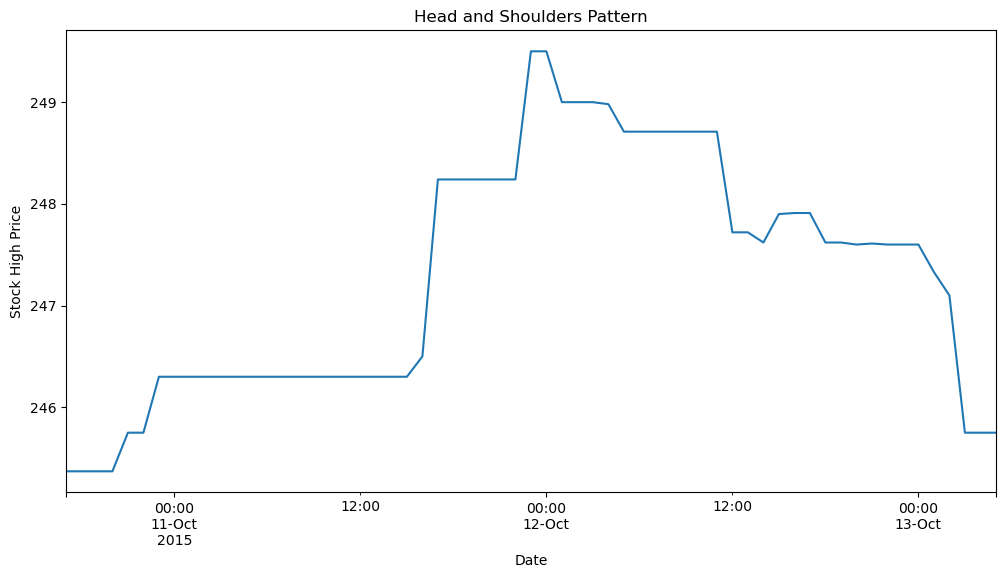

In [36]:
if pattern_ranges:
    first_pattern = pattern_ranges[22]
    pattern_data = bitcoin_df.loc[first_pattern[0]:first_pattern[1]]
    pattern_data['high'].plot(figsize=(12, 6), title='Head and Shoulders Pattern')
    plt.xlabel('Date')
    plt.ylabel('Stock High Price')
    plt.show()
else:
    print("No patterns detected.")


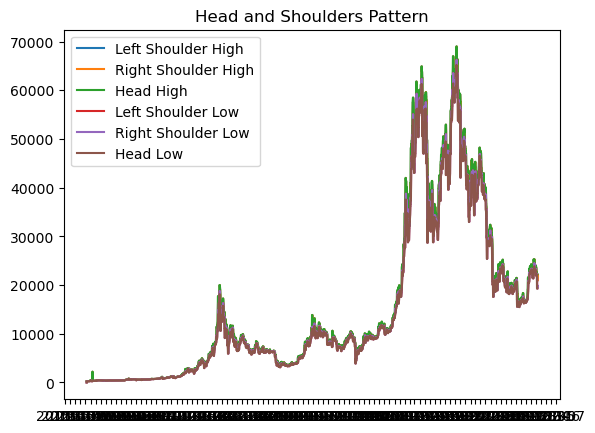

In [14]:

# Load data into Pandas DataFrame
df = bitcoin_1h.copy()

# Define the length of the left and right shoulders, and the head
left_shoulder = 30
right_shoulder = 30
head = 60

# Define the indicators for the pattern
left_shoulder_high = df['high'].rolling(window=left_shoulder).max()
right_shoulder_high = df['high'].rolling(window=right_shoulder).max()
head_high = df['high'].rolling(window=head).max()

left_shoulder_low = df['low'].rolling(window=left_shoulder).min()
right_shoulder_low = df['low'].rolling(window=right_shoulder).min()
head_low = df['low'].rolling(window=head).min()

# Define the condition for a head and shoulders pattern
head_shoulders = np.where(
    (df['close'] > left_shoulder_high.shift(1)) &
    (df['close'] > right_shoulder_high.shift(1)) &
    (df['close'] > head_high.shift(1)) &
    (df['close'].shift(-left_shoulder) < left_shoulder_low.shift(-left_shoulder)) &
    (df['close'].shift(-right_shoulder) < right_shoulder_low.shift(-right_shoulder)) &
    (df['close'].shift(-head) < head_low.shift(-head))
    , 1, 0)

# Plot the head and shoulders pattern
fig, ax = plt.subplots()
# candlestick_ohlc(ax, df.values, width=0.6, colorup='green', colordown='red')
ax.set_title('Head and Shoulders Pattern')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.plot(df.index, left_shoulder_high, label='Left Shoulder High')
ax.plot(df.index, right_shoulder_high, label='Right Shoulder High')
ax.plot(df.index, head_high, label='Head High')
ax.plot(df.index, left_shoulder_low, label='Left Shoulder Low')
ax.plot(df.index, right_shoulder_low, label='Right Shoulder Low')
ax.plot(df.index, head_low, label='Head Low')
ax.legend()
plt.show()
